In [2]:
pip install tensorflow

In [3]:
import tensorflow  as tf
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
tf.__version__

'2.14.0'

In [5]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [6]:
data = pd.read_csv("forestfires.csv")

In [7]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [9]:
data["size_category"].value_counts()
#checking the class in target variable with their counts

small    378
large    139
Name: size_category, dtype: int64

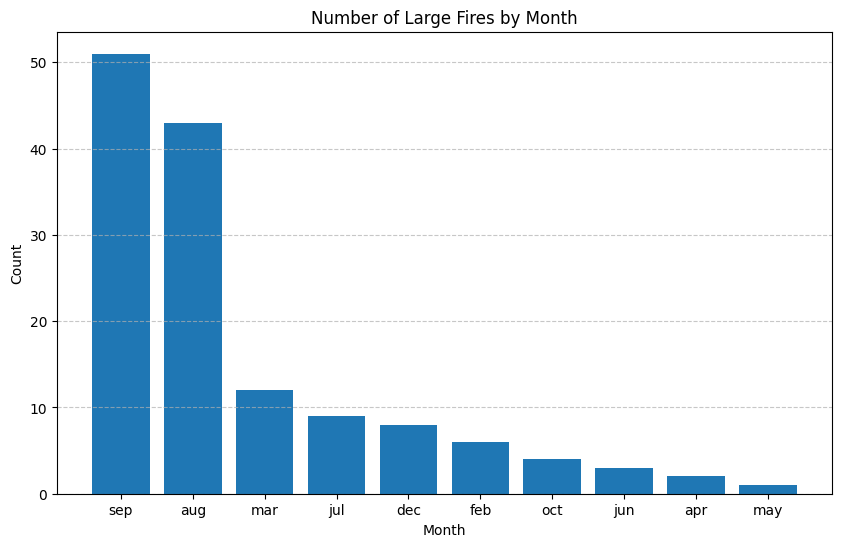

In [10]:
large_fire = data[data["size_category"] == "large"]
large_fire_by_month = large_fire.groupby("month").size().sort_values(ascending=False)

# Create a bar plot
plt.style.use("default")
plt.figure(figsize=(10, 6))
plt.bar(large_fire_by_month.index, large_fire_by_month.values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Number of Large Fires by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

<Figure size 1200x600 with 0 Axes>

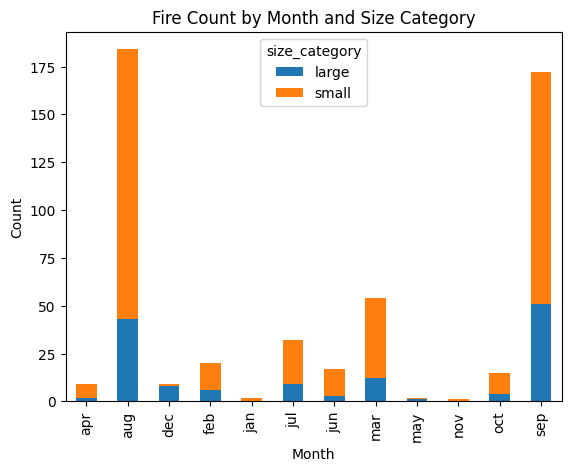

In [11]:
# barplot
fire_counts_by_month = data.groupby(['month', 'size_category']).size().unstack()
plt.figure(figsize=(12, 6))
fire_counts_by_month.plot(kind='bar',stacked=True)
plt.title('Fire Count by Month and Size Category')
plt.xlabel('Month')
plt.ylabel('Count')

# checking the target variable classes by Visualization
# from the visualization imbalance data set

Text(0.5, 1.0, 'Distribution of Size Categories')

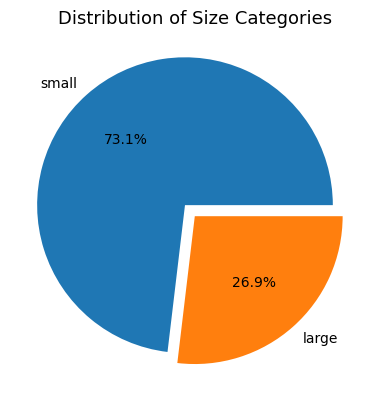

In [12]:
plt.pie(data["size_category"].value_counts(),labels=data["size_category"].value_counts().index,
        autopct="%1.1f%%",startangle=0,explode=[0.1,0]);
plt.title("Distribution of Size Categories",size=13)

In [13]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data.isna().value_counts()
#checking the null values counts

month  day    FFMC   DMC    DC     ISI    temp   RH     wind   rain   area   dayfri  daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  size_category
False  False  False  False  False  False  False  False  False  False  False  False   False   False   False   False   False   False   False     False     False     False     False     False     False     False     False     False     False     False     False            517
dtype: int64

In [15]:
data.duplicated().value_counts()
# checking the duplicates data

False    509
True       8
dtype: int64

In [16]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [17]:
df = data.drop_duplicates()
#drop/remove the duplicates data

In [18]:
df.shape

(509, 31)

In [19]:
df.describe()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


Preparing Data for Model

In [21]:
x = df.iloc[:,2:-1]
#select the predicters

In [22]:
x.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
y = df["size_category"]
#select the target variable

In [24]:
y.unique()

array(['small', 'large'], dtype=object)

In [25]:
category_mapping = {'small': 0, 'large': 1}
y = y.map(category_mapping)
#convert categerical into numerical class using mapping technic


In [26]:
y.unique()

array([0, 1])

In [27]:
x.shape[1]

28

creat the model

In [28]:
#build the keras model using sequantial fuction
model = tf.keras.models.Sequential()# install the model -Dense  for  fully connected layer
model.add(tf.keras.layers.Dense(50,input_dim=x.shape[1],activation="relu"))#first hidden layer
model.add(tf.keras.layers.Dense(25,activation="relu"))#second hidden layer
# output layer
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))# sigmoid fuction is used for binary classification-output node is 1
# Weight and bias are done by keras defult method -" glorot_uniform "

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1450      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2751 (10.75 KB)
Trainable params: 2751 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
#compiling model
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
#keep the model is ready to process the data

In [31]:
f_m = model.fit(x,y,validation_split=0.25,epochs = 50,batch_size=100)
# run the model
#epoch - is n of complete pass through the entire data set

Epoch 1/50
4/4 [==============================] - 1s 82ms/step - loss: 43.4557 - accuracy: 0.2598 - val_loss: 28.3880 - val_accuracy: 0.3281
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 22.9097 - accuracy: 0.2835 - val_loss: 12.4516 - val_accuracy: 0.3984
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 5.9988 - accuracy: 0.4304 - val_loss: 3.0131 - val_accuracy: 0.6562
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 4.5866 - accuracy: 0.7454 - val_loss: 6.4514 - val_accuracy: 0.6797
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 6.4759 - accuracy: 0.7454 - val_loss: 7.0458 - val_accuracy: 0.6797
Epoch 6/50
4/4 [==============================] - 0s 18ms/step - loss: 6.3152 - accuracy: 0.7454 - val_loss: 5.9043 - val_accuracy: 0.6797
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 5.0190 - accuracy: 0.7480 - val_loss: 3.6320 - val_accuracy: 0.6875
Epoch 8/50
4/4 [=======

In [32]:
from tensorflow.keras.utils import plot_model

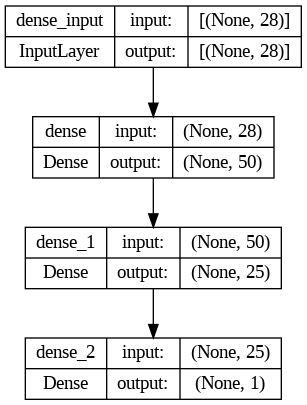

In [33]:
plot_model(model, to_file='model.png', show_shapes=True)

In [34]:
scores = model.evaluate(x,y)
#evaluvate the model

16/16 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.9077


In [35]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.77%


In [36]:
# Visualize training history

# list all data in history
model.history.history.keys()


dict_keys([])

In [37]:
f_m.history.keys()
# model have accuracy _train ,val_accuracy - for the validation data 25%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
print("accuracy of test data : %.2f%%" % (max(f_m.history["val_accuracy"])*100))

accuracy of test data : 85.94%


In [39]:
print("accuracy of train data : %.2f%%" % (max(f_m.history["accuracy"])*100))

accuracy of train data : 92.65%


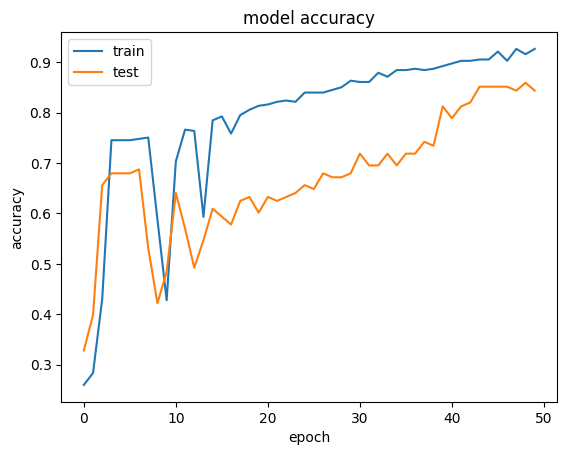

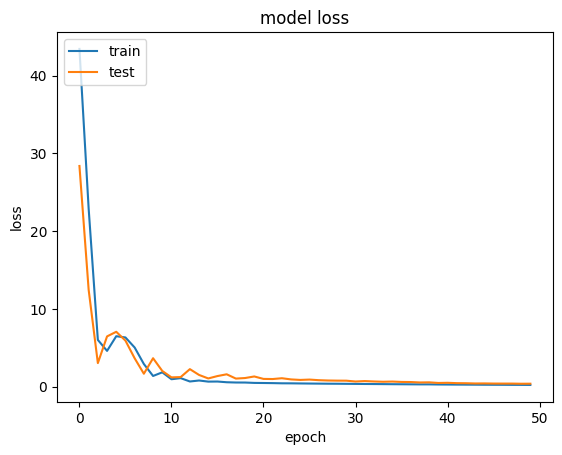

In [40]:

plt.plot(f_m.history['accuracy'])
plt.plot(f_m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(f_m.history['loss'])
plt.plot(f_m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
